In [2]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st    

In [4]:
df=pd.read_csv("Biomedic_clean2.csv")

In [5]:
df = df.drop('Unnamed: 0.1', axis=1)

In [6]:
df.columns

Index(['ID', 'ID Name', 'Souches', 'Diabetes', 'Hypertension',
       'Hospital_before', 'Infection_Freq', 'AMX/AMP', 'AMC', 'CZ', 'FOX',
       'CTX/CRO', 'IPM', 'GEN', 'AN', 'Acide nalidixique', 'ofx', 'CIP', 'C',
       'Co-trimoxazole', 'Furanes', 'colistine', 'Collection_Date',
       'Etat_Complet', 'Pays', 'Ville', 'age', 'gender', 'Age_Group',
       'Unnamed: 0', 'Population', 'Temp. Min Moy. Annuelle (°C)',
       'Temp. Moy. Annuelle (°C)', 'Temp. Max Moy. Annuelle (°C)',
       'Humidité Moyenne (%)', 'Ensoleillement Moyen (heures/an)',
       'Pluviométrie Moyenne (mm/an)'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

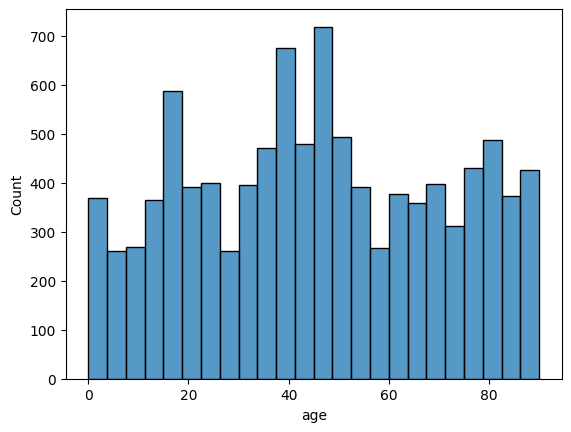

In [7]:
sns.histplot(df["age"])

<Axes: ylabel='age'>

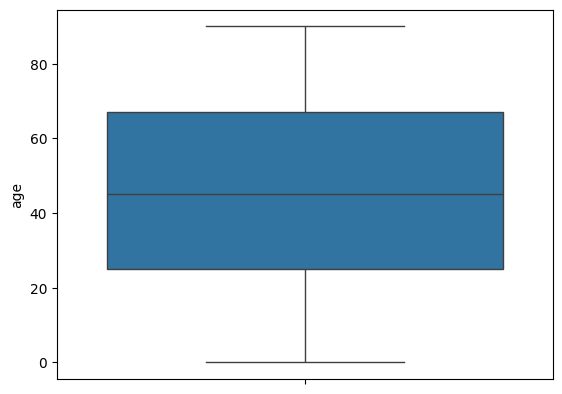

In [8]:
sns.boxplot(df["age"])

Les âges sont bien répartis, pas de valeurs abérantes.

In [9]:
total = df['gender'].value_counts().sum()

df['gender'].value_counts()/total

gender
F    0.797125
M    0.202875
Name: count, dtype: float64

In [10]:
df.shape

(9947, 37)

Il y a 79,7% de femmes dans le dataset, c'est très déséquilibré.

<Axes: xlabel='gender', ylabel='age'>

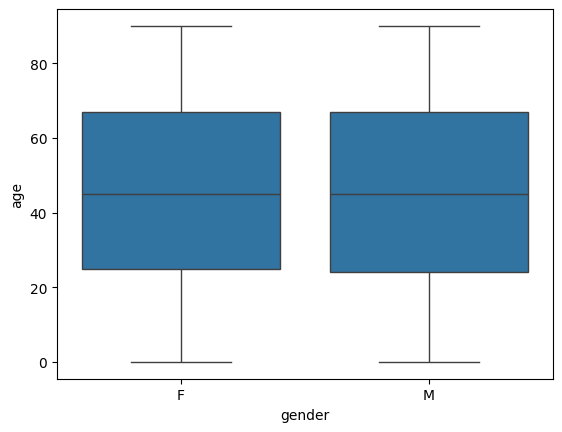

In [11]:
sns.boxplot(data=df,x='gender',y='age')

Les âges sont pareillement distribués entre hommes et femmes.

<Axes: xlabel='count', ylabel='Souches'>

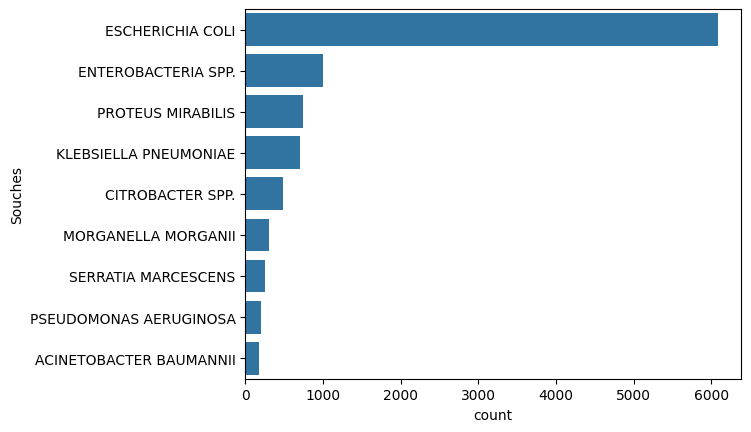

In [12]:
sns.barplot(df['Souches'].value_counts(), orient='h')

A voir ce qu'on fait de Enterobacteria spp. ...

<Axes: xlabel='Infection_Freq', ylabel='count'>

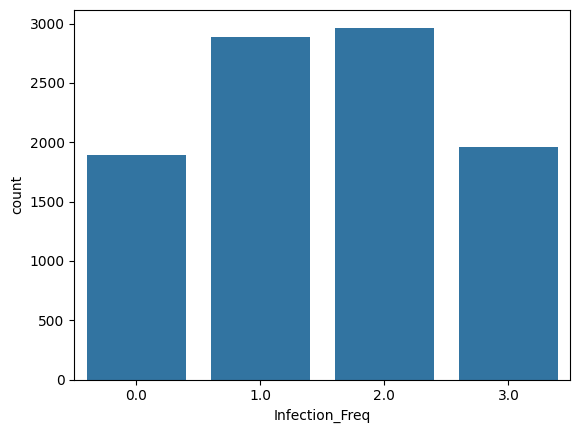

In [13]:
sns.barplot(df['Infection_Freq'].value_counts())

<Axes: xlabel='Infection_Freq', ylabel='Souches'>

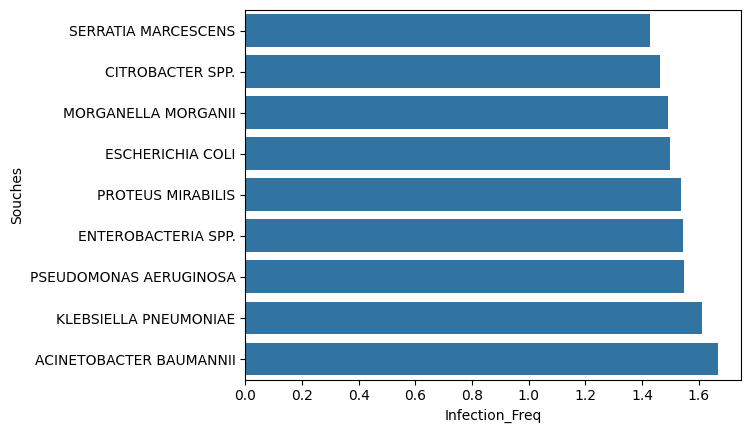

In [14]:
IF_par_souche = df[['Infection_Freq','Souches']].groupby('Souches').mean().sort_values('Infection_Freq')
sns.barplot(x=IF_par_souche['Infection_Freq'], y=IF_par_souche.index ,orient = 'h')

<Axes: ylabel='None'>

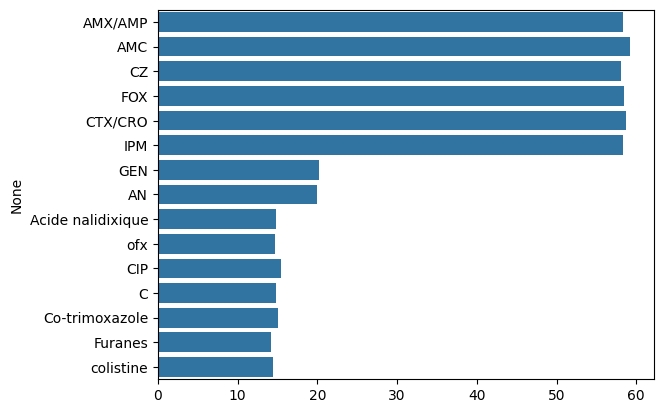

In [15]:
Taux_global = df.iloc[:,7:22].mean()*100
sns.barplot(y=Taux_global.index, x=Taux_global.values, orient = 'h')

In [16]:
atb_souch = pd.concat([df['Souches'].to_frame(),df.iloc[:,7:22]],axis=1)


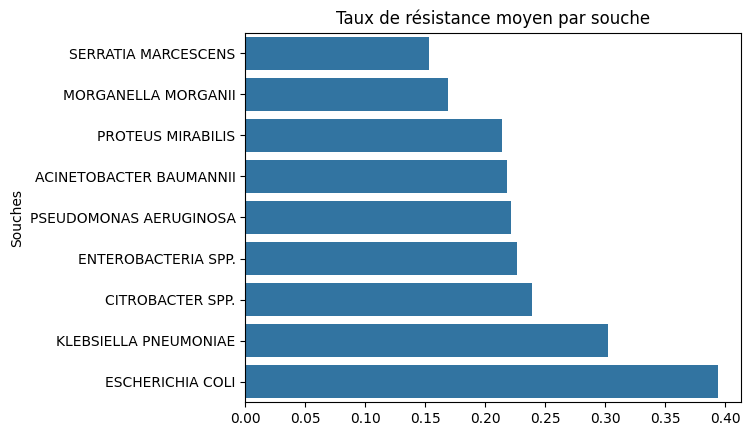

In [17]:
sns.barplot(atb_souch.groupby('Souches').mean().T.mean().sort_values(), orient='h')
plt.title("Taux de résistance moyen par souche")
plt.show()

<Axes: ylabel='Souches'>

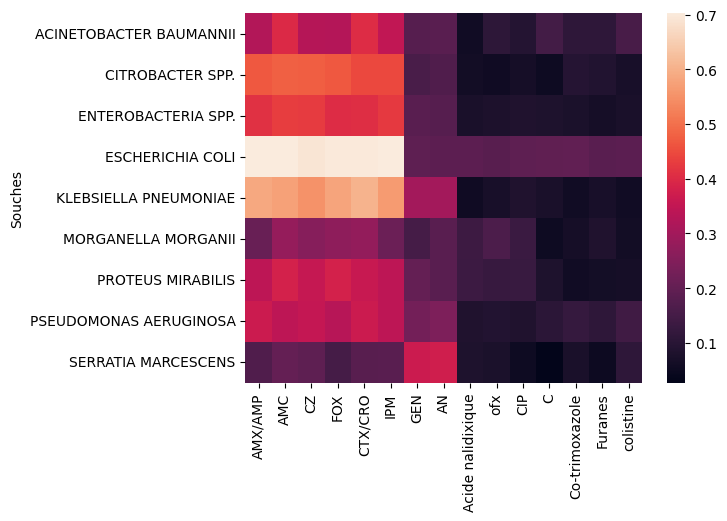

In [18]:
sns.heatmap(atb_souch.groupby('Souches').mean())

On peut déjà observer un saut entre les premiers antibio jusqu'à IPM qui subissent des taux de résistance assez élevés, puis les autres qui sont beaucoup plus efficaces en globalité. Cela peut-être du à l'ancienneté de certains antibios, à vérifier.

In [19]:
#Etude par catégorie d'âge
bins = [0, 9, 19, 39, 59, 150]
labels = ['<10', '10-19', '20-39', '40-59','60+']

df['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

C:\Users\M Coffre\AppData\Local\Temp\ipykernel_13704\1535481071.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  Table_totaux = df_temp.pivot_table(index='Souches',columns='age_cat',values='Total_age_cat')
C:\Users\M Coffre\AppData\Local\Temp\ipykernel_13704\1535481071.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  Table_val = df_temp.pivot_table(index='Souches',columns='age_cat',values='Total_age_cat', aggfunc='count')


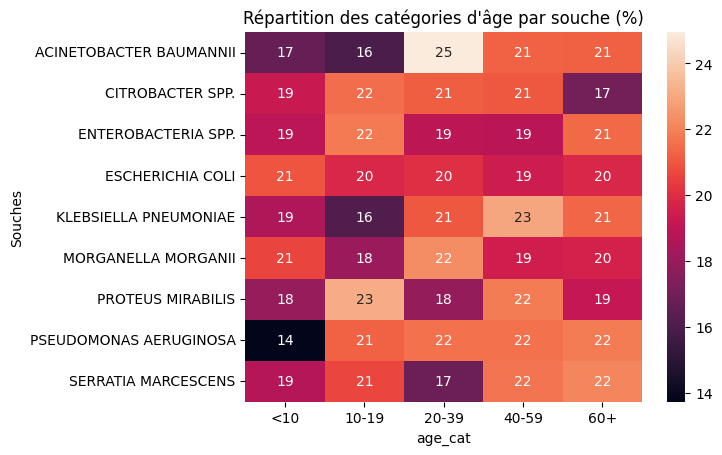

In [55]:
#Création de la table de répartition des cas par catégorie d'âge en % pour chaque souche
totaux_ages = df['age_cat'].value_counts().to_frame()
totaux_ages.columns=['Total_age_cat']
totaux_bact = df['Souches'].value_counts().to_frame()
totaux_bact.columns=['Total_souche']
df_temp = df.merge(totaux_ages,left_on='age_cat', right_on=totaux_ages.index).merge(totaux_bact,left_on='Souches', right_on=totaux_bact.index)[['Souches','age_cat','Total_age_cat','Total_souche']]
Table_totaux = df_temp.pivot_table(index='Souches',columns='age_cat',values='Total_age_cat')
Table_val = df_temp.pivot_table(index='Souches',columns='age_cat',values='Total_age_cat', aggfunc='count')
Table_val = Table_val/Table_totaux*100
Table_finale = (Table_val.T*100/Table_val.T.sum()).T.round(2)
sns.heatmap(Table_finale,annot=True)
plt.title("Répartition des catégories d'âge par souche (%)")
plt.show()




Pseudomonas est plus rare chez les enfants de moins de 10 ans, Acetobacter est plus fréquente cez les 20-39 ans.
Débiaisé en prenant en compte que les classes d'âge n'ont pas les même populations.

In [27]:
df_mob=pd.read_csv("mobility.csv",sep=';')

In [28]:
df_mob['Souches'] = df_mob['Souches'].str.upper()

In [29]:
df = df.merge(df_mob,how='left',on='Souches')

In [30]:
atb_mob = pd.concat([df[['Mobility']],df.iloc[:,7:22]],axis=1)
atb_mob

,Mobility,AMX/AMP,AMC,CZ,FOX,CTX/CRO,IPM,GEN,AN,Acide nalidixique,ofx,CIP,C,Co-trimoxazole,Furanes,colistine
0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9943,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9944,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9945,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


<Axes: ylabel='Mobility'>

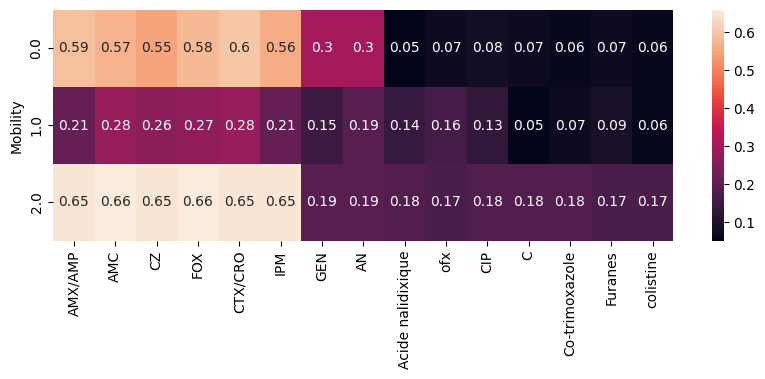

In [31]:
#Taux de résistance par type de mobilité
plt.figure(figsize=(10,3))
sns.heatmap(atb_mob.groupby('Mobility').mean().round(2),annot=True)


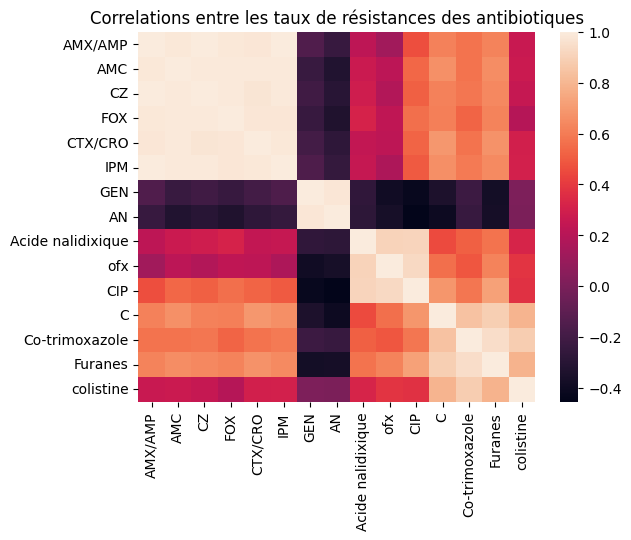

In [56]:
#Correlation entre les taux de résistances des atb
sns.heatmap(atb_souch.groupby('Souches').mean().corr())
plt.title("Correlations entre les taux de résistances des antibiotiques")
plt.show()

On voit bien apparaître les 4 groupes avec des correlations, et le groupe other est aussi corrélé modérément avec b-lactames et quinolones.

In [33]:
#Calcul du nombre de résistances par soche pour faire une cohorte de bactéries multirésistantes
df['Total_res']=(atb_souch.T.iloc[1:,:]==1).sum()
df['Multi_res']=df['Total_res'].apply(lambda x:x>=3)

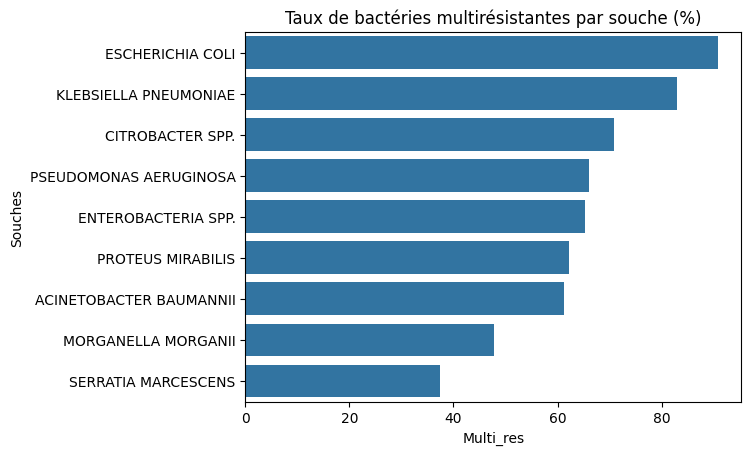

In [64]:
#Pourcentages de bactéries multirésistantes par type de bactérie
taux_mult = df[['Souches', 'Multi_res']].groupby('Souches').mean().sort_values('Multi_res', ascending=False)
sns.barplot(x=taux_mult['Multi_res']*100, y=taux_mult.index, orient='h')
plt.title("Taux de bactéries multirésistantes par souche (%)")
plt.show()

In [35]:
df=df.drop('Total_res',axis=1)

In [36]:
df.to_csv('Biomedic_clean3.csv')

<Axes: xlabel='Multi_res', ylabel='count'>

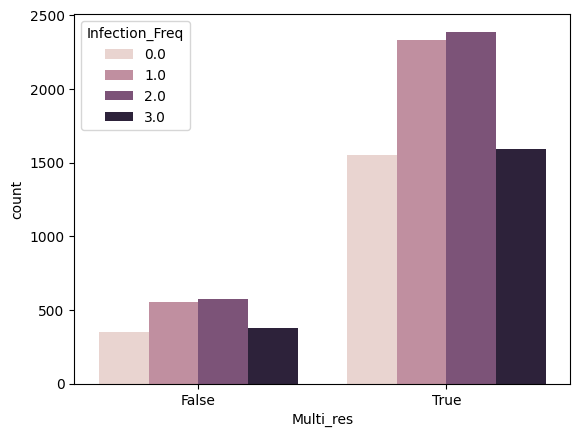

In [37]:
sns.countplot(data=df, x='Multi_res', hue='Infection_Freq')

In [38]:
#Corrélation entre fréquence d'infection et multirésistance par état.
df[['Etat_Complet','Infection_Freq','Multi_res']].groupby('Etat_Complet').mean().corr()

,Infection_Freq,Multi_res
Infection_Freq,1.000000,0.082538
Multi_res,0.082538,1.000000


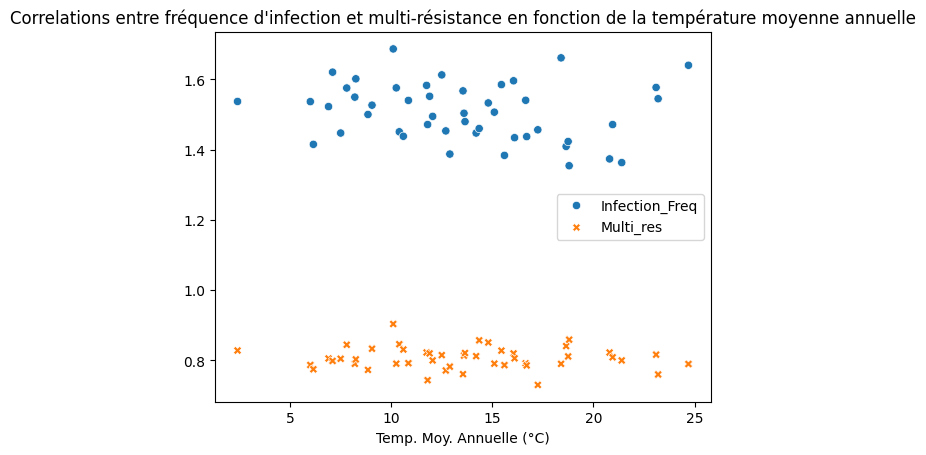

In [65]:
#Visualisation de la correlation entre la fréquence d'infection et de la multi-résistance en fonction de la température moyenne annuelle
sns.scatterplot(df[['Temp. Moy. Annuelle (°C)','Infection_Freq','Multi_res']].groupby('Temp. Moy. Annuelle (°C)').mean())
plt.title('Correlations entre fréquence d\'infection et multi-résistance en fonction de la température moyenne annuelle')
plt.show()


C:\Users\M Coffre\AppData\Local\Temp\ipykernel_13704\1536059507.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  Multi_res_age=df.pivot_table(index='Souches',columns='age_cat',values='Multi_res',aggfunc='mean').round(2)


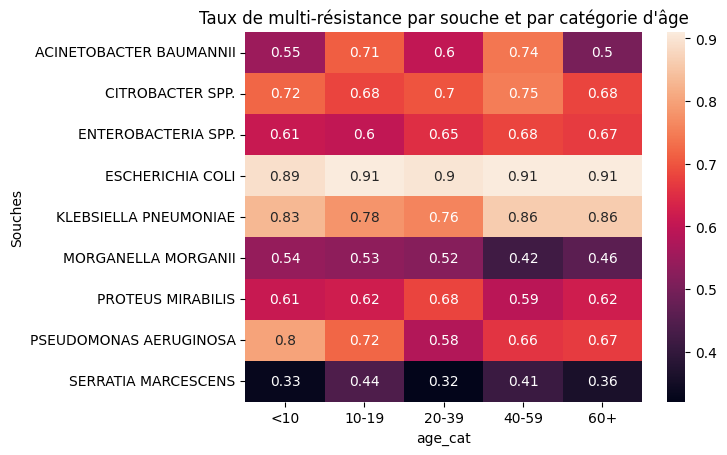

In [40]:
#Taux de multi-résistances par rapport à l'âge.
Multi_res_age=df.pivot_table(index='Souches',columns='age_cat',values='Multi_res',aggfunc='mean').round(2)
sns.heatmap(Multi_res_age,annot=True)
plt.title('Taux de multi-résistance par souche et par catégorie d\'âge')
plt.show()

In [41]:
Mult_diab = df[['Diabetes','Souches','Multi_res']].groupby(['Souches','Diabetes']).mean()

<Axes: xlabel='Multi_res', ylabel='Souches'>

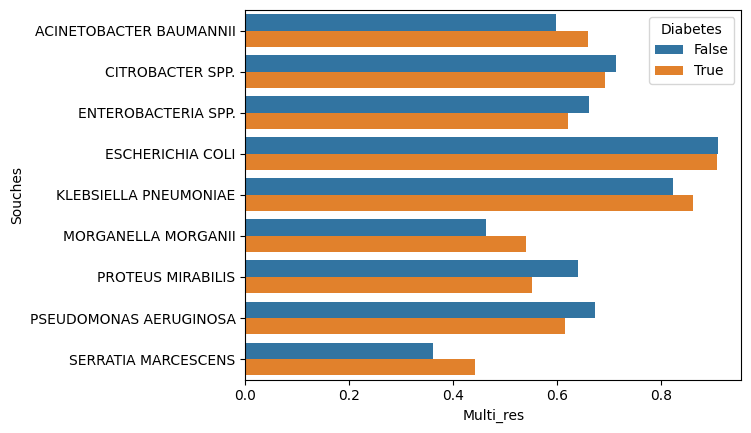

In [42]:
sns.barplot(y=Mult_diab.index.get_level_values(0), x=Mult_diab['Multi_res'],hue=Mult_diab.index.get_level_values(1))


<Axes: xlabel='Multi_res', ylabel='Souches'>

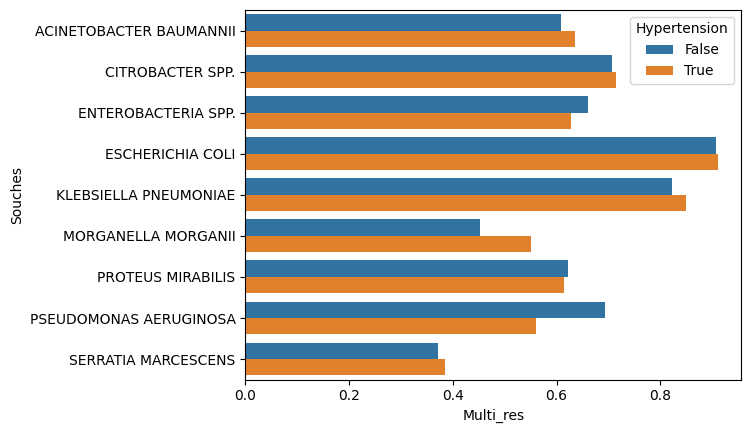

In [43]:
Mult_hyp = df[['Hypertension','Souches','Multi_res']].groupby(['Souches','Hypertension']).mean()
sns.barplot(y=Mult_hyp.index.get_level_values(0), x=Mult_hyp['Multi_res'],hue=Mult_hyp.index.get_level_values(1))

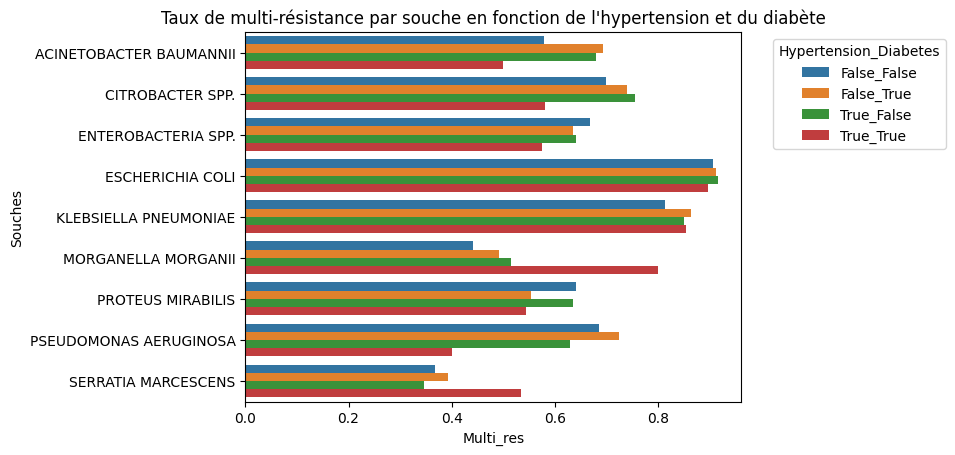

In [66]:
#Taux de multi-résistance par souche en fonction de l\'hypertension et du diabète
Mult_hyp_dia = df[['Hypertension','Diabetes','Souches','Multi_res']].groupby(['Souches','Hypertension','Diabetes']).mean()
Mult_hyp_dia['Hyp_Dia']=Mult_hyp_dia.index.get_level_values(1).astype(str)+'_'+Mult_hyp_dia.index.get_level_values(2).astype(str)
sns.barplot(y=Mult_hyp_dia.index.get_level_values(0), x=Mult_hyp_dia['Multi_res'],hue=Mult_hyp_dia['Hyp_Dia'],orient='h')
plt.title('Taux de multi-résistance par souche en fonction de l\'hypertension et du diabète')
plt.legend(title='Hypertension_Diabetes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

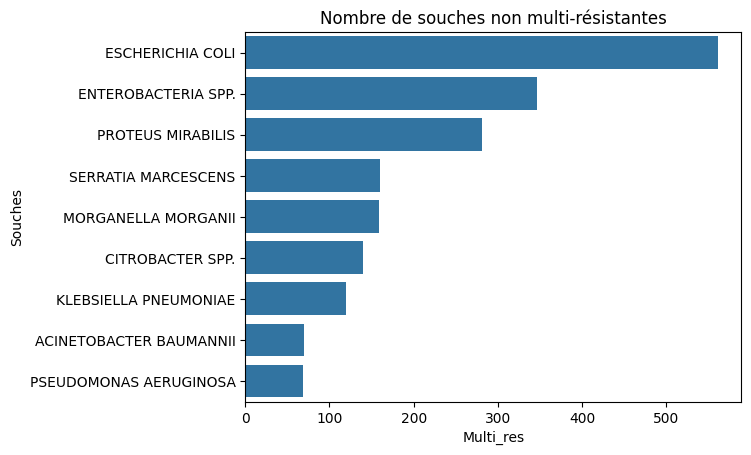

In [47]:
pas_res = df[['Souches','Multi_res']].loc[df['Multi_res'] == False].groupby('Souches').count().sort_values('Multi_res',ascending=False)
sns.barplot(y=pas_res.index, x=pas_res['Multi_res'], orient='h')
plt.title('Nombre de souches non multi-résistantes')
plt.show()

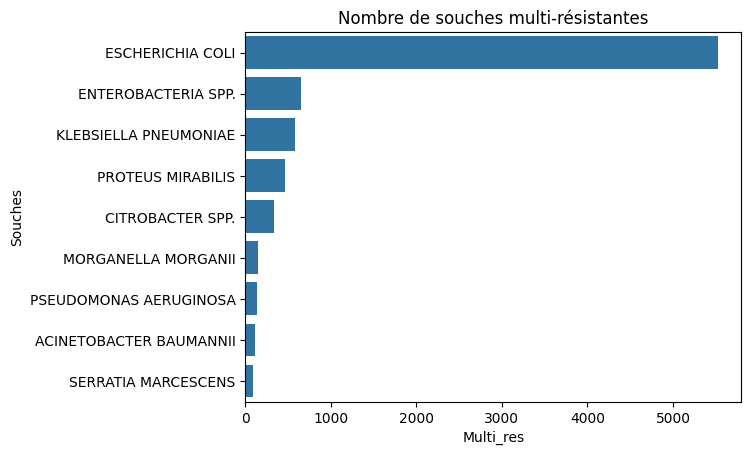

In [48]:
resist = df[['Souches','Multi_res']].loc[df['Multi_res'] == True].groupby('Souches').count().sort_values('Multi_res',ascending=False)
sns.barplot(y=resist.index, x=resist['Multi_res'], orient='h')
plt.title('Nombre de souches multi-résistantes')
plt.show()

In [49]:
"""
Préparation du Bootstrapping
bootstrap_means = []

for i in range(5000):
    temp_sample = np.random.choice(perf, replace=True, size=len(perf))
    temp_mean = np.mean(temp_sample)
    bootstrap_means.append(temp_mean)

"""

'\nPréparation du Bootstrapping\nbootstrap_means = []\n\nfor i in range(5000):\n    temp_sample = np.random.choice(perf, replace=True, size=len(perf))\n    temp_mean = np.mean(temp_sample)\n    bootstrap_means.append(temp_mean)\n\n'

In [50]:
df.columns

Index(['ID', 'ID Name', 'Souches', 'Diabetes', 'Hypertension',
       'Hospital_before', 'Infection_Freq', 'AMX/AMP', 'AMC', 'CZ', 'FOX',
       'CTX/CRO', 'IPM', 'GEN', 'AN', 'Acide nalidixique', 'ofx', 'CIP', 'C',
       'Co-trimoxazole', 'Furanes', 'colistine', 'Collection_Date',
       'Etat_Complet', 'Pays', 'Ville', 'age', 'gender', 'Age_Group',
       'Unnamed: 0', 'Population', 'Temp. Min Moy. Annuelle (°C)',
       'Temp. Moy. Annuelle (°C)', 'Temp. Max Moy. Annuelle (°C)',
       'Humidité Moyenne (%)', 'Ensoleillement Moyen (heures/an)',
       'Pluviométrie Moyenne (mm/an)', 'age_cat', 'Mobility', 'Multi_res'],
      dtype='object')

In [ ]:
df_sm_b = df.loc[df['Souches'] == "SERRATIA MARCESCENS"][['Diabetes', 'AMX/AMP', 'AMC', 'CZ', 'FOX','CTX/CRO', 'IPM']]
st.ttest_ind(df_sm_b.loc[df_sm_b['Diabetes']==1].iloc[:,1:], df_sm_b.loc[df_sm_b['Diabetes']==0].iloc[:,1:], equal_var=False)

In [73]:
population_df = df[["Etat_Complet", "Population"]].drop_duplicates().set_index("Etat_Complet")
# Colonnes antibiotiques
antibiotics_cols = df.loc[:, "AMX/AMP":"colistine"].columns

# Moyenne brute par État
resistance_by_state = df.groupby("Etat_Complet")[antibiotics_cols].mean()
# Score global de résistance
resistance_by_state["Score_global"] = resistance_by_state[antibiotics_cols].mean(axis=1)

# Nettoyer et compter les cas par état (nombre absolu)
# La colonne 'Etat_Complet' dans df_complet doit contenir les noms d'états non abrégés
case_counts = df['Etat_Complet'].value_counts().to_frame()



# Score pondéré par population (pour 100k habitants)
case_counts["Incidence_pour_100k"] = (
    case_counts["count"] / population_df["Population"]
) * 100000

<Axes: xlabel='Incidence_pour_100k', ylabel='Score_global'>

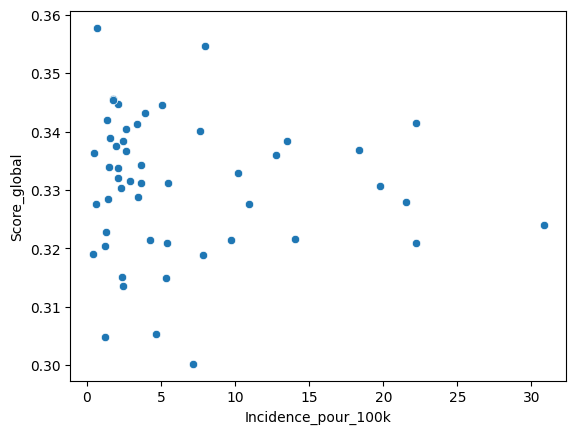

In [74]:
sns.scatterplot(x=case_counts["Incidence_pour_100k"], y=resistance_by_state["Score_global"])